In [1]:
import numpy as np
import os
import time

from PIL import Image
#import trackpy as tp
import cv2

import sys
sys.path.append('/eno/jdfeathe/pepe/')
#sys.path.append('/home/jack//workspaces/jupyter-workspace/pepe/')
from pepe.preprocess import crossMask, checkImageType, circularMask, lightCorrectionDiff, rectMask, mergeMasks

import matplotlib.pyplot as plt

from IPython.display import clear_output

plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 15

KeyboardInterrupt: 

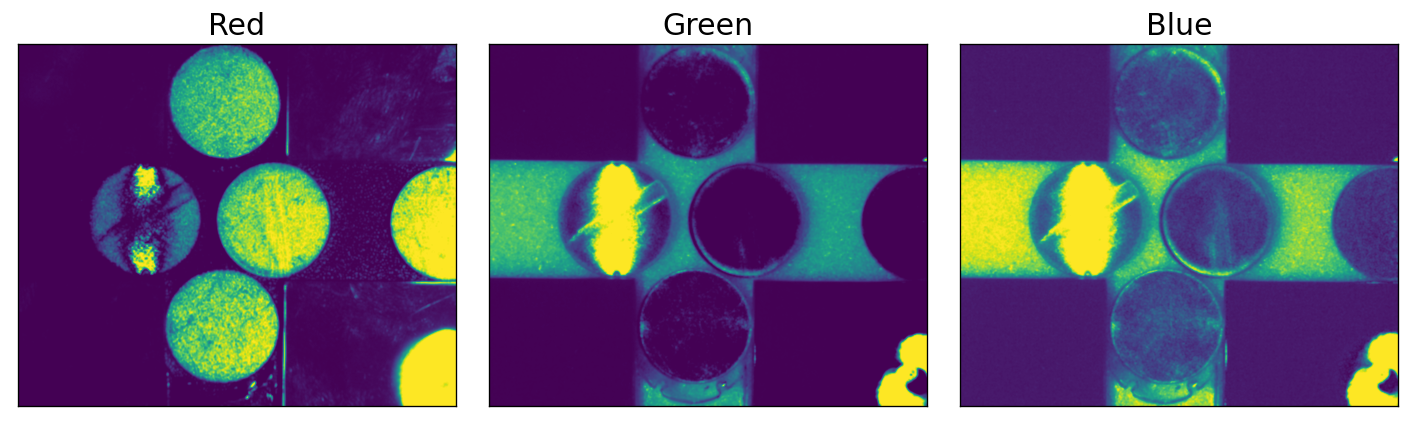

In [24]:
while True:
    #time.sleep(3)
    clear_output(wait=True)
    imageFile = '../images/2022-04-08_Test.bmp'
    try:
        image = checkImageType(imageFile)
    except:
        continue
        
    image = image[None:None,20:-20,:]
    
    #fig, ax = plt.subplots(1, 3, figsize=(12,4))
    fig = plt.figure(figsize=(12,4))

    titles = ['Red', 'Green', 'Blue']

    for i in range(3):
        #ax = fig.add_subplot(1, 3, i+1, projection='3d')
        #ax.plot_surface(np.arange(image.shape[1]),
        #                np.vstack(np.arange(image.shape[0])), cv2.blur(image[:,:,i], (5,5)), cmap=plt.cm.jet)
        
        ax = fig.add_subplot(1, 3, i+1)
        ax.imshow(cv2.blur(image[:,:,i] / np.max(image[:,:,i]), (5,5)))#, cmap=plt.cm.jet)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[i])

    fig.tight_layout()
    #plt.savefig('../images/uv_track_blue_red_green.png')
    plt.show()

In [23]:
imageFile = '../images/2022-04-08_Test.bmp'

img = Image.open('Data/' + imageFile)

imgArr = np.array(img)

maskX = [1850, 2800]
maskY = [950, 1875]
maskArr = np.zeros([np.shape(imgArr)[0], np.shape(imgArr)[1]])

for i in range(len(imgArr)):
    for j in range(len(imgArr[0])):
        if (i >= maskY[0] and i <= maskY[1]):
            maskArr[i,j] = 1
        elif (j >= maskX[0] and j <= maskX[1]):
            maskArr[i,j] = 1

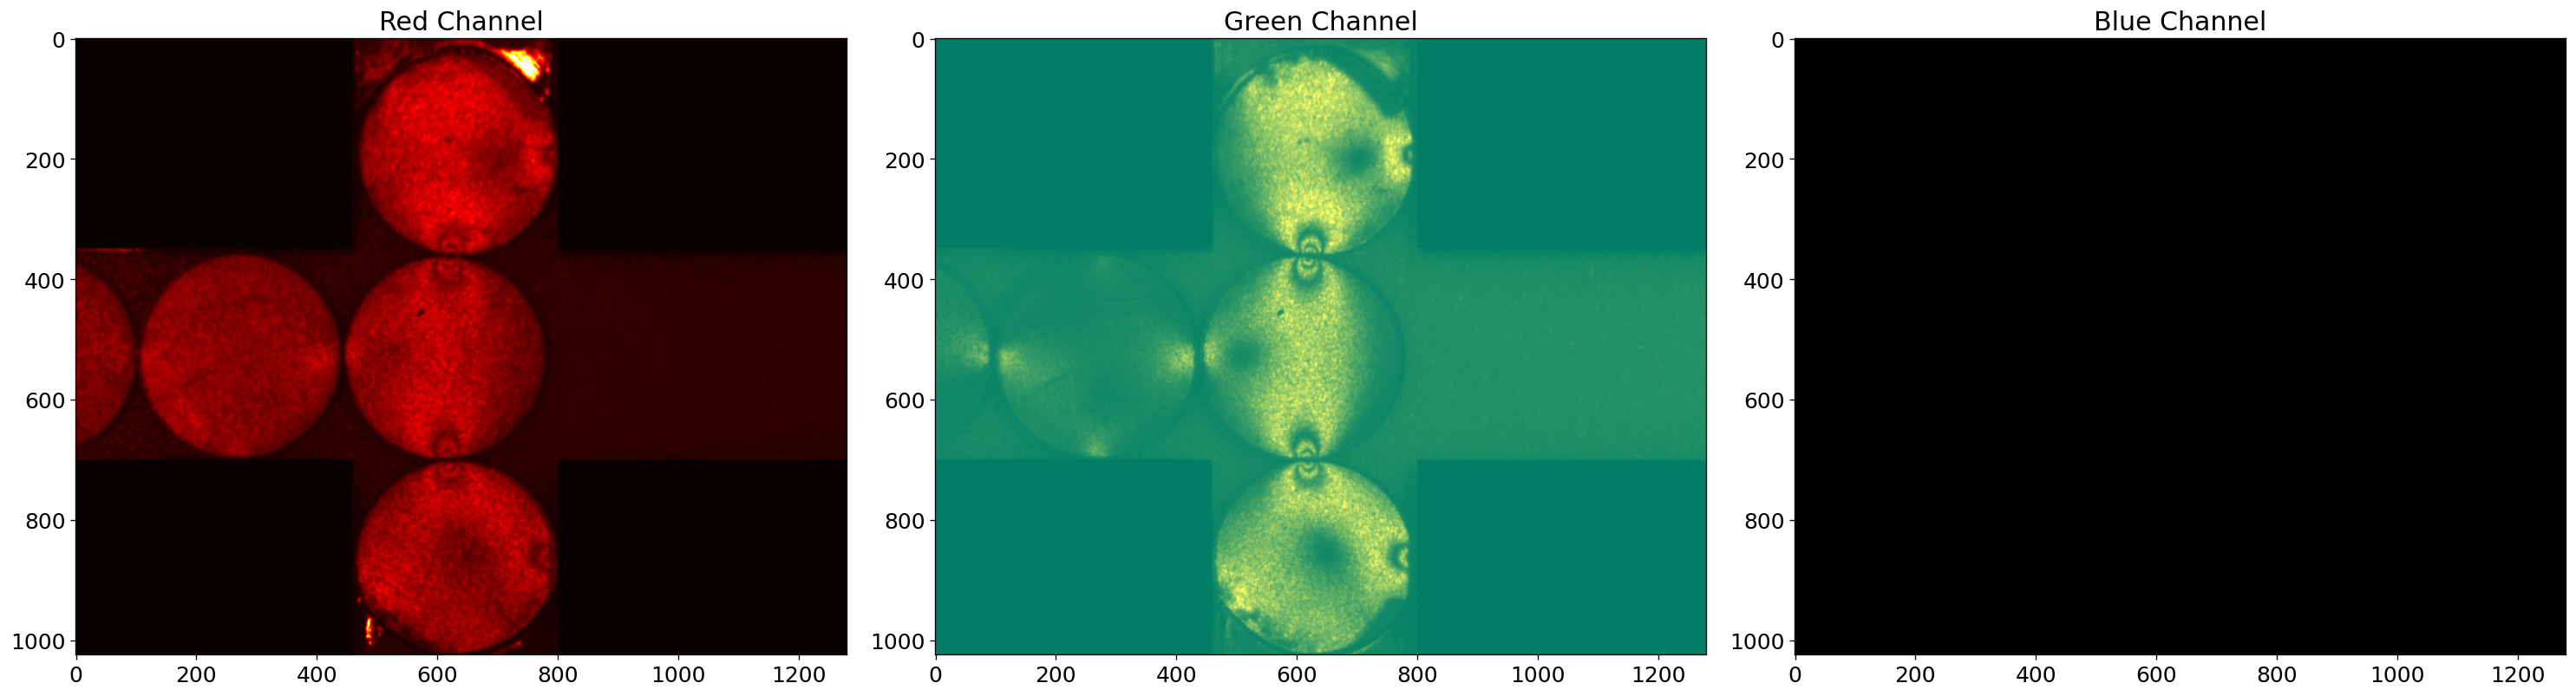

In [24]:
imageFile = 'Image2.bmp'

img = Image.open('Data/' + imageFile)

imgArr = np.array(img)

maskX = [460, 800]
maskY = [350, 700]
maskArr = np.zeros([np.shape(imgArr)[0], np.shape(imgArr)[1]])

for i in range(len(imgArr)):
    for j in range(len(imgArr[0])):
        if (i >= maskY[0] and i <= maskY[1]):
            maskArr[i,j] = 1
        elif (j >= maskX[0] and j <= maskX[1]):
            maskArr[i,j] = 1

#maskArr = np.ones([np.shape(imgArr)[0], np.shape(imgArr)[1]])

fig, ax = plt.subplots(1, 3, figsize=(25,8))

downsample = 2
detectionImage = imgArr[::downsample,::downsample,0]

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(detectionImage, 
                    cv2.HOUGH_GRADIENT,
                    dp=1, # Accumulator (no idea what it does, but 1 is good)
                    minDist=30, # Minimum distance between circles
                    param1=50, # Threshold for canny edge detection
                    param2=30, # Accumulator threshold
                    minRadius=80,
                    maxRadius=100)

if detected_circles is not None:
    for pt in detected_circles[0, :]:
        c = plt.Circle((pt[0]*downsample, pt[1]*downsample), pt[2]*downsample, fill=False, color='red', linewidth=4)     
        #ax[0].add_artist(c)

colors = ['hot', 'summer', 'bone']
        
for i in range(3):
    ax[i].imshow(imgArr[:,:,i] * maskArr, cmap=plt.get_cmap(colors[i]))
    
ax[0].set_title('Red Channel')
ax[1].set_title('Green Channel')
ax[2].set_title('Blue Channel')

#ax[2].imshow(maskArr)
fig.tight_layout()
plt.savefig('sample2_2022-01-10.png')
plt.show()

Docstring:
HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles
.   @brief Finds circles in a grayscale image using the Hough transform.
.   
.   The function finds circles in a grayscale image using a modification of the Hough transform.
.   
.   Example: :
.   @include snippets/imgproc_HoughLinesCircles.cpp
.   
.   @note Usually the function detects the centers of circles well. However, it may fail to find correct
.   radii. You can assist to the function by specifying the radius range ( minRadius and maxRadius ) if
.   you know it. Or, in the case of #HOUGH_GRADIENT method you may set maxRadius to a negative number
.   to return centers only without radius search, and find the correct radius using an additional procedure.
.   
.   It also helps to smooth image a bit unless it's already soft. For example,
.   GaussianBlur() with 7x7 kernel and 1.5x1.5 sigma or similar blurring may help.
.   
.   @param image 8-bit, single-chann

In [28]:
# Testing tracking
detectionImage = imgArr[::4,::4,0]
f = tp.locate(detectionImage, 201, minmass=100)

/usr/lib/python3.9/site-packages/trackpy/find.py:130: UserWarning: All local maxima were in the margins.
  warnings.warn("All local maxima were in the margins.", UserWarning)


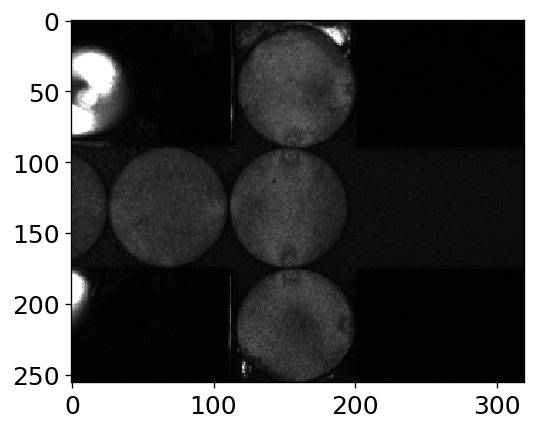

<AxesSubplot:>

In [29]:
tp.annotate(f, detectionImage)

[[[306.5 265.5  82.9]
  [320.5  61.5  59.8]
  [ 90.5 227.5  89.5]
  [325.5 466.5  42.2]]]


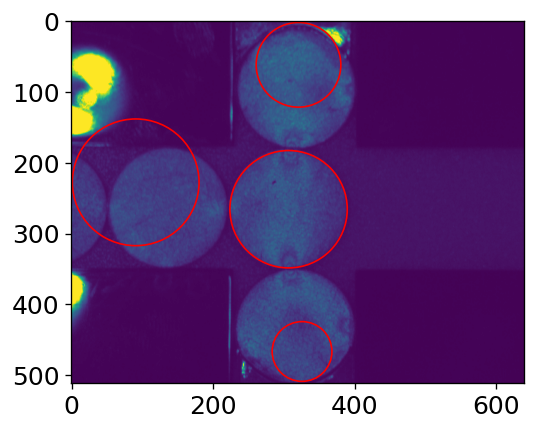

In [36]:
detectionImage = imgArr[::2,::2,0]

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(detectionImage, 
                   cv2.HOUGH_GRADIENT, 1, 200, param1 = 50,
               param2 = 30, minRadius = 30, maxRadius = 100)

print(detected_circles)
# Draw circles that are detected.

fig, ax = plt.subplots()

if detected_circles is not None:

    
    for pt in detected_circles[0, :]:
        c = plt.Circle((pt[0], pt[1]), pt[2], fill=False, color='red')
        
        ax.add_artist(c)
        
ax.imshow(detectionImage)
plt.show()

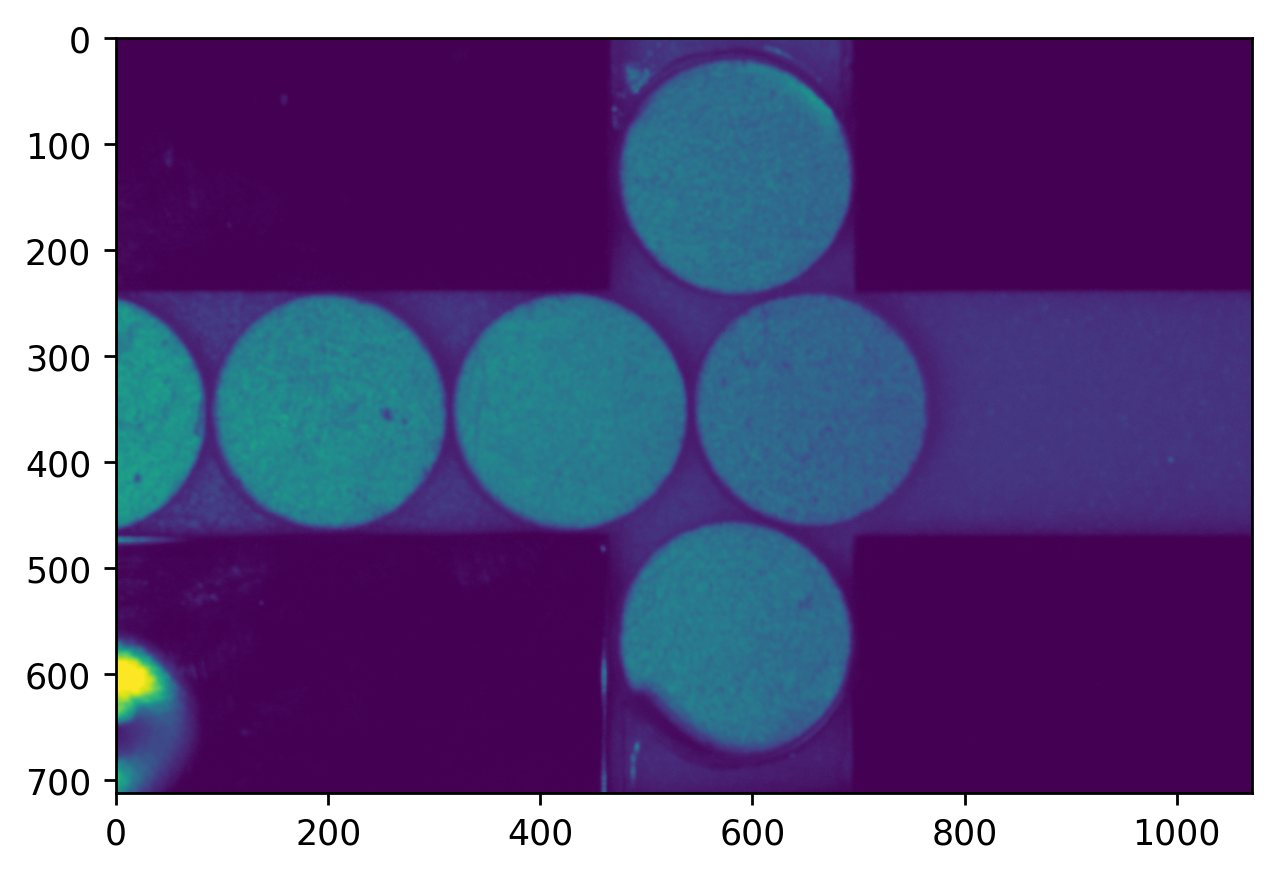

In [58]:
import cv2
import os

image_folder = 'Data/20211122A/'
video_name = 'video.avi'
downsample = 2
timeDownsample = 1

images = [img for img in os.listdir(image_folder) if img.endswith(".JPG")]
images.sort()

images = images[::timeDownsample]
images = images[:180]

frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 30, (int(width/downsample),int(height/downsample)))

for image in images:
    img = cv2.imread(os.path.join(image_folder, image))
    imgArr = np.array(img)[::downsample,::downsample,:]# * maskArr[::downsample, ::downsample,None]

    detectionImage = imgArr[::2,::2,1]
    plt.imshow(detectionImage)
    
    # Apply Hough transform on the blurred image.
    detected_circles = cv2.HoughCircles(detectionImage, 
                   cv2.HOUGH_GRADIENT, 1, 100, param1 = 50,
               param2 = 30, minRadius = 100, maxRadius = 120)
    
    imgArr[:,:,0] = imgArr[:,:,2]
    imgArr[:,:,1] = imgArr[:,:,2]
    
    img = cv2.cvtColor(imgArr[:,:,0], cv2.COLOR_GRAY2BGR)
    
    if detected_circles is not None:
        detected_circles = detected_circles[0]
        for dc in detected_circles:
            img = cv2.circle(img, (int(dc[0]*2), int(dc[1]*2)), int(dc[2]*2), (255, 0, 0), 3)
            
    video.write(img)
    
cv2.destroyAllWindows()
video.release()

In [54]:
detected_circles

array([[620.5, 349.5, 107.3],
       [582.5, 568.5, 108.9],
       [170.5, 353.5, 108.6],
       [584.5, 127.5, 108.6],
       [395.5, 353.5, 108.5]], dtype=float32)